##Autism Prediction

"Autism spectrum disorder (ASD) is a developmental impairment that can present with considerable social, communicative, and behavioural difficulties. Although there is typically nothing about people with ASD that distinguishes them from others in terms of appearance, they may communicate, engage, conduct, and learn in ways that are unique to them. People with ASD have a wide range of cognitive, reasoning, and problem-solving abilities, ranging from gifted to severely impaired. Some persons with ASD require a great deal of assistance in their daily life, while others require less.

Dataset: The data is made up of survey responses from people who completed an app form. There are labels that indicate whether or not the person has been diagnosed with autism.

Aim: Build machine learning models to predict the possibility of having autism based on the given features.

Target Variable: Class/ASD

The evaluation metric for this competition is AUC-ROC Score.

#Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Reading Datasets

In [3]:
train = pd.read_csv("../input/autism-prediction/Autism-prediction/train.csv")
test = pd.read_csv("../input/autism-prediction/Autism-prediction/test.csv")
sample_submission = pd.read_csv("../input/autism-prediction/Autism-prediction/sample_submission.csv")
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [4]:
train.shape

(800, 22)

#EDA

Checking for null values

In [5]:
train.isnull().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


-> No null values present

Checking Data Info

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

Converting age to integer

In [7]:
train['age'] = train['age'].astype(int,errors='ignore')

Checking Duplicates

In [8]:
train.drop_duplicates(inplace=True)
train

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,1,1,1,1,1,1,1,1,1,...,f,White-European,no,yes,United States,no,13.390868,18 and more,Self,1
796,797,1,1,0,0,1,0,0,0,1,...,f,Asian,no,no,New Zealand,no,9.454201,18 and more,Self,0
797,798,0,0,0,0,0,0,1,0,1,...,m,White-European,yes,no,Jordan,no,6.805509,18 and more,Self,1
798,799,1,1,1,1,1,1,0,1,1,...,f,Middle Eastern,no,yes,United States,no,3.682732,18 and more,Relative,0


-> No duplicates are present

In [9]:
train.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

**Data Handling for Categorical Data**

Checking for spelling mistakes, case errors and whether the groups/categories shown in the unique values match the domain specific and if there exists an unusual category, delete that specific entry.

In [10]:
#Dropping the column "age_desc" since it is an unimportant column as it is just a further description of the "age" column
#Dropping the columns "country_of_res" since this is not a factor for the disease
train = train.drop(["contry_of_res","age_desc"], axis=1)

In [11]:
train

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,used_app_before,result,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,18,f,White-European,no,no,no,7.819715,Self,0
1,2,0,0,0,0,0,0,0,0,0,1,13,f,South Asian,no,no,no,10.544296,?,0
2,3,1,1,1,1,1,1,0,0,1,1,14,f,White-European,no,no,no,13.167506,Self,1
3,4,0,0,0,1,0,0,0,0,0,0,61,f,South Asian,no,no,no,1.530098,?,0
4,5,0,0,0,0,1,0,0,0,1,1,14,m,Black,no,yes,no,7.949723,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,1,1,1,1,1,1,1,1,1,1,42,f,White-European,no,yes,no,13.390868,Self,1
796,797,1,1,0,0,1,0,0,0,1,1,17,f,Asian,no,no,no,9.454201,Self,0
797,798,0,0,0,0,0,0,1,0,1,1,18,m,White-European,yes,no,no,6.805509,Self,1
798,799,1,1,1,1,1,1,0,1,1,1,19,f,Middle Eastern,no,yes,no,3.682732,Relative,0


In [12]:
#The spelling of "autism" is written as "austim"
train = train.rename(columns={'austim':'autism'})
train

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,used_app_before,result,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,1,18,f,White-European,no,no,no,7.819715,Self,0
1,2,0,0,0,0,0,0,0,0,0,1,13,f,South Asian,no,no,no,10.544296,?,0
2,3,1,1,1,1,1,1,0,0,1,1,14,f,White-European,no,no,no,13.167506,Self,1
3,4,0,0,0,1,0,0,0,0,0,0,61,f,South Asian,no,no,no,1.530098,?,0
4,5,0,0,0,0,1,0,0,0,1,1,14,m,Black,no,yes,no,7.949723,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,1,1,1,1,1,1,1,1,1,1,42,f,White-European,no,yes,no,13.390868,Self,1
796,797,1,1,0,0,1,0,0,0,1,1,17,f,Asian,no,no,no,9.454201,Self,0
797,798,0,0,0,0,0,0,1,0,1,1,18,m,White-European,yes,no,no,6.805509,Self,1
798,799,1,1,1,1,1,1,0,1,1,1,19,f,Middle Eastern,no,yes,no,3.682732,Relative,0


Unique Values for Categorical Data

In [13]:
#gender
train.gender.unique()

array(['f', 'm'], dtype=object)

In [14]:
#jaundice
train.jaundice.unique()

array(['no', 'yes'], dtype=object)

In [15]:
#autism
train.autism.unique()

array(['no', 'yes'], dtype=object)

In [16]:
#used_app_before
train.used_app_before.unique()

array(['no', 'yes'], dtype=object)

In [17]:
#relation
train.relation.unique()

array(['Self', '?', 'Health care professional', 'Parent', 'Relative',
       'Others'], dtype=object)

In [18]:
#ethnicity
train.ethnicity.unique()

array(['White-European', 'South Asian', 'Black', 'Asian',
       'Middle Eastern ', '?', 'others', 'Latino', 'Turkish', 'Others',
       'Hispanic', 'Pasifika'], dtype=object)

-> There are inappropriate values in Relation and Ethnicity Columns and they need to be handled.

**Handling the Inappropriate Values**

In [19]:
#Replacing "others" in ethnicity with "Others"
train['ethnicity'] = train['ethnicity'].replace('others', 'Others')

In [20]:
#Replacing "?" in ethnicity with Mode of ethnicity column
train['ethnicity'] = train['ethnicity'].replace('?', train['ethnicity'].mode()[0])

In [21]:
train.ethnicity.unique()

array(['White-European', 'South Asian', 'Black', 'Asian',
       'Middle Eastern ', 'Others', 'Latino', 'Turkish', 'Hispanic',
       'Pasifika'], dtype=object)

In [22]:
#Replacing "?" in relation with Mode of relation column
train['relation'] = train['relation'].replace('?', train['relation'].mode()[0])

In [23]:
train.relation.unique()

array(['Self', 'Health care professional', 'Parent', 'Relative', 'Others'],
      dtype=object)

**Data Handling for Continuous Data**

If the data is CONTINOUS, check with reference to domain whether the following parameters are valid or not:

      1. Negative Numbers are allowed or not.
      2. Positive Numbers are allowed or not.
      3. Decimals are allowed or just Integers are Expected.

In [24]:
#      If any of the above is not allowed, delete that specific column entry
#     Column               Non-Null Count  Dtype
#---  ------               --------------  -----
# 10  age                 800 non-null    int64    --> Continuous (NO, YES, NO)
# 15  result              800 non-null    float64  --> Continuous (YES, YES, YES)

In [25]:
#age
#Checking for ngeative values
train[train.age<0]

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,used_app_before,result,relation,Class/ASD


-> No negative values are present

variable: result
-> Since all checkpoints are allowed, there is no need for Data Handling

**Converting all discrete categorical values to numerical values using Label encoding**

In [26]:
from sklearn import preprocessing

In [27]:
label_encoder = preprocessing.LabelEncoder()

In [28]:
#gender
print(train['gender'].unique())
train['gender']= label_encoder.fit_transform(train['gender'])
print(train['gender'].unique())

['f' 'm']
[0 1]


In [29]:
#jaundice
print(train['jaundice'].unique())
train['jaundice']= label_encoder.fit_transform(train['jaundice'])
print(train['jaundice'].unique())

['no' 'yes']
[0 1]


In [30]:
#autism
print(train['autism'].unique())
train['autism']= label_encoder.fit_transform(train['autism'])
print(train['autism'].unique())

['no' 'yes']
[0 1]


In [31]:
#used_app_before
print(train['used_app_before'].unique())
train['used_app_before']= label_encoder.fit_transform(train['used_app_before'])
print(train['used_app_before'].unique())

['no' 'yes']
[0 1]


In [32]:
#relation
print(train['relation'].unique())
train['relation']= label_encoder.fit_transform(train['relation'])
print(train['relation'].unique())

['Self' 'Health care professional' 'Parent' 'Relative' 'Others']
[4 0 2 3 1]


In [33]:
#ethnicity
print(train['ethnicity'].unique())
train['ethnicity']= label_encoder.fit_transform(train['ethnicity'])
print(train['ethnicity'].unique())

['White-European' 'South Asian' 'Black' 'Asian' 'Middle Eastern ' 'Others'
 'Latino' 'Turkish' 'Hispanic' 'Pasifika']
[9 7 1 0 4 5 3 8 2 6]


**Correlation Matrix**

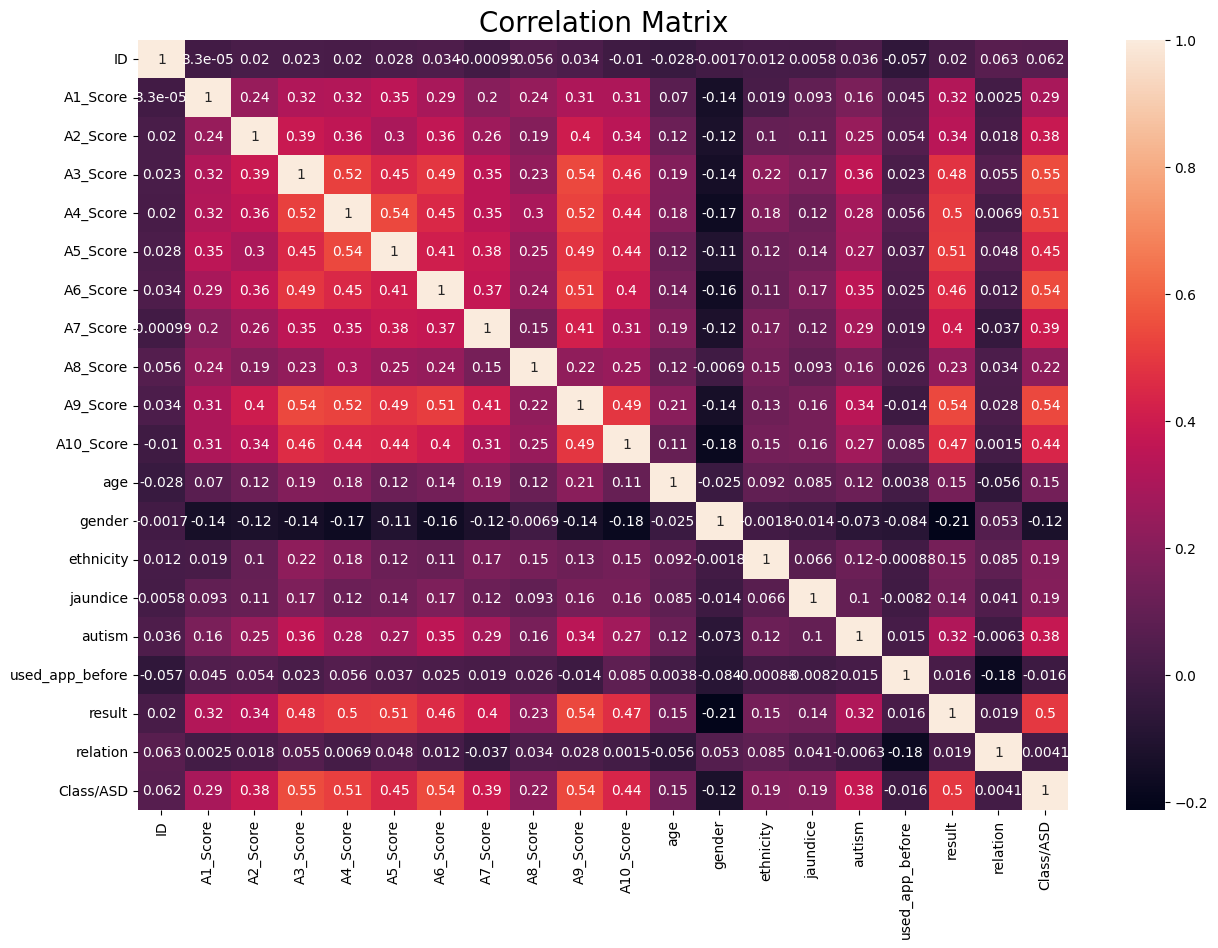

In [34]:
plt.figure(figsize=(15, 10))
sns.heatmap(train.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [35]:
train.corr()['Class/ASD'].sort_values(ascending=False)[1:]

,Class/ASD
A3_Score,0.549618
A6_Score,0.542588
A9_Score,0.538688
A4_Score,0.512792
result,0.496165
A5_Score,0.448473
A10_Score,0.439587
A7_Score,0.394660
A2_Score,0.380703
autism,0.377079


-> We can see that A3_Score,A6_Score,A9_Score and A4_Score has the highest correlation with result, which implies that they have the highest say in determining whether the person has Autism or not.

#BALANCING THE CLASSES - OVERSAMPLING

In [36]:
train["Class/ASD"].value_counts()

,count
Class/ASD,
0,615
1,185


Class Distribution - Before Oversampling

Text(0, 0.5, 'Count')

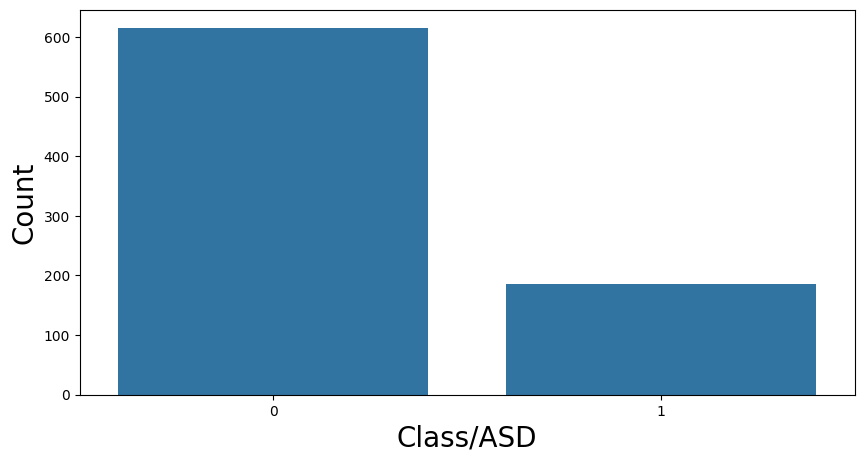

In [38]:
class_label = train["Class/ASD"].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=class_label.index, y=class_label) # Changed this line
plt.xlabel('Class/ASD', fontsize=20);
plt.ylabel('Count', fontsize=20)

We can see that the 2 classes are highly imbalanced. Thus, we perform the oversampling operation in order to balance the classes.

**Oversampling**

In [39]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = train[train["Class/ASD"] == 0]
df_2 = train[train["Class/ASD"] == 1]

# Upsample minority class
df_2_upsampled = resample(df_2,
                                 replace=True,     # sample with replacement
                                 n_samples=615,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
train_upsampled = pd.concat([df_1, df_2_upsampled])

# Display new class counts
train_upsampled["Class/ASD"].value_counts()

,count
Class/ASD,
0,615
1,615


Class Distribution - After oversampling

Text(0, 0.5, 'Count')

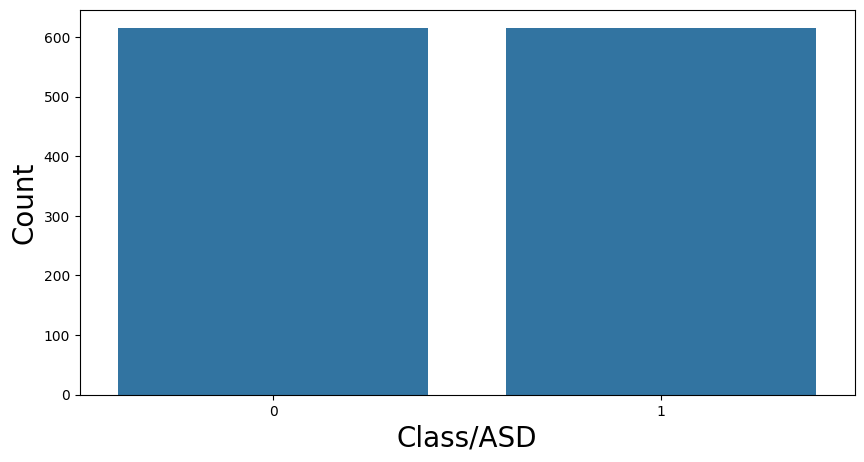

In [41]:
class_label = train_upsampled["Class/ASD"].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=class_label.index, y=class_label) # Pass x and y as named arguments
plt.xlabel('Class/ASD', fontsize=20);
plt.ylabel('Count', fontsize=20)

#BINARY CLASSIFICATION

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc

In [43]:
accuracy_list = []
f1_list = []
roc_auc_list = []

Train Test Evaluation Function

In [44]:
def result(model):

    #fit on data
    model.fit(X_train, y_train)

    #prediction
    pred = model.predict(X_test)

    #performance of model
    print("Classification Report: \n", classification_report(y_test, pred))
    print("-" * 100)
    print()

    #accuracy of model
    acc = accuracy_score(y_test, pred)
    accuracy_list.append(acc)
    print("Accuracy Score: ", acc)
    print("-" * 100)
    print()

    #f1-score of model
    f1 = f1_score(y_test, pred)
    f1_list.append(f1)
    print("F1 Score: ", f1)
    print("-" * 100)
    print()

    #roc-auc curve of model
    fpr,tpr,threshold = roc_curve(y_test,pred)
    auc_value = auc(fpr,tpr)
    rocauc_score = roc_auc_score(y_test, pred)
    roc_auc_list.append(rocauc_score)
    plt.figure(figsize=(5,5),dpi=100)
    print("ROC-AUC Score: ", f1)
    print("-" * 100)
    print()
    plt.plot(fpr,tpr,linestyle='-',label = "(auc_value = %0.3f)" % auc_value)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    print()

    #confusion matrix for model
    print("Confusion Matrix: ")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');
    plt.title('Confusion Matrix', fontsize=20)

Independent and Dependent Features

In [45]:
x = train_upsampled.drop("ID", axis=1)
x = x.drop("Class/ASD", axis=1)
y = train_upsampled[["Class/ASD"]]

In [46]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
#scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Logistic Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       129
           1       0.87      0.87      0.87       117

    accuracy                           0.88       246
   macro avg       0.88      0.88      0.88       246
weighted avg       0.88      0.88      0.88       246

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.8780487804878049
----------------------------------------------------------------------------------------------------

F1 Score:  0.8717948717948718
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.8717948717948718
----------------------------------------------------------------------------------------------------



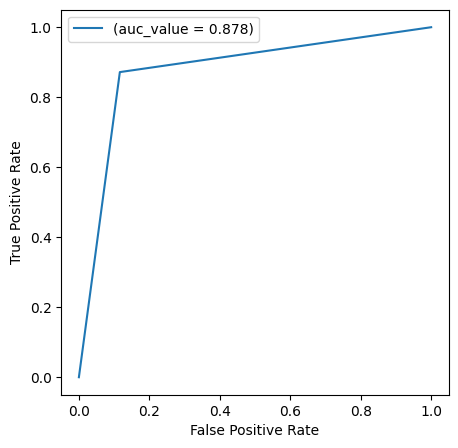


Confusion Matrix: 


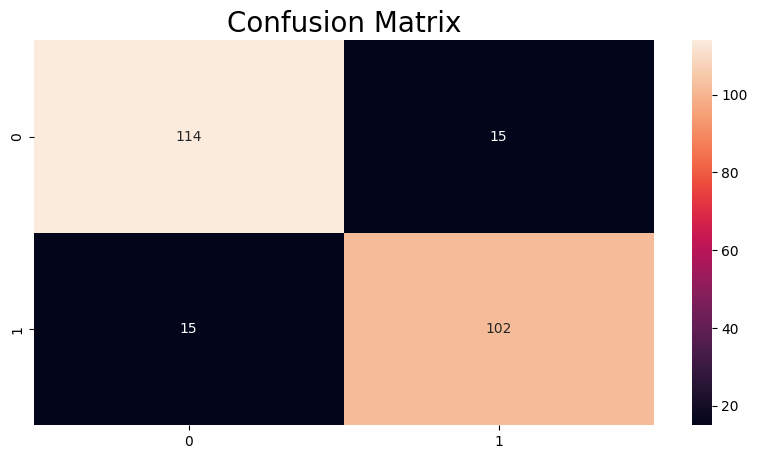

In [48]:
lr = LogisticRegression()
result(lr)

**Random Forest Classifier**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       129
           1       0.94      0.98      0.96       117

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9634146341463414
----------------------------------------------------------------------------------------------------

F1 Score:  0.9623430962343097
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9623430962343097
----------------------------------------------------------------------------------------------------



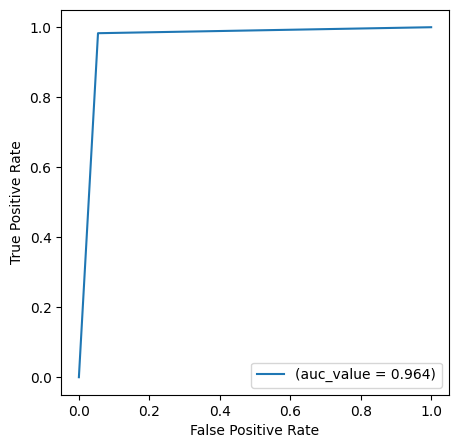


Confusion Matrix: 


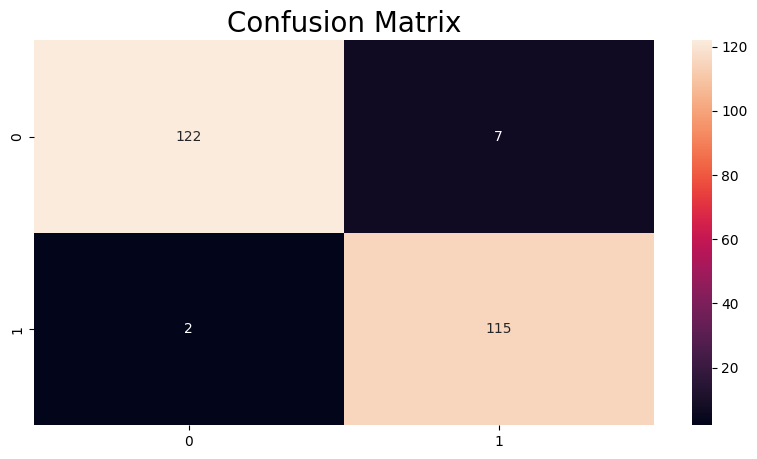

In [49]:
rf = RandomForestClassifier()
result(rf)

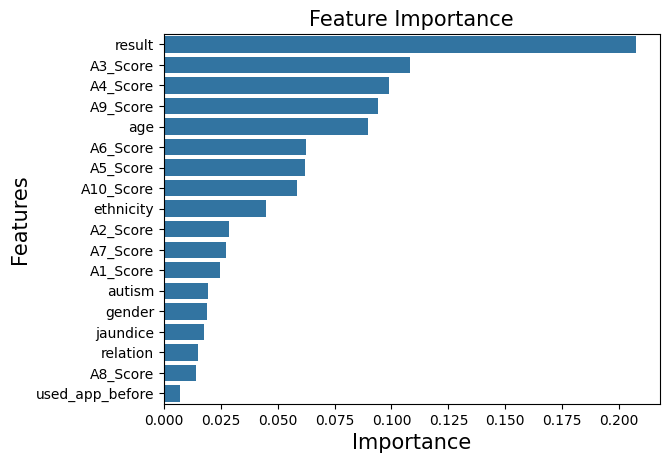

           Features  Importance
16           result    0.207447
2          A3_Score    0.108267
3          A4_Score    0.098826
8          A9_Score    0.094231
10              age    0.089900
5          A6_Score    0.062635
4          A5_Score    0.062003
9         A10_Score    0.058361
12        ethnicity    0.044843
1          A2_Score    0.028798
6          A7_Score    0.027186
0          A1_Score    0.024736
14           autism    0.019367
11           gender    0.019190
13         jaundice    0.017483
17         relation    0.015242
7          A8_Score    0.014187
15  used_app_before    0.007297


In [50]:
important_features = pd.DataFrame({'Features': x.columns,
                                   'Importance': rf.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()
print(important_features)

-> Considering the results from the correlation analysis done and from the above diagram, result, A3, A9, A4, age and A6 have the highest importance.

**KNN Classifier**

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       129
           1       0.87      0.91      0.89       117

    accuracy                           0.89       246
   macro avg       0.89      0.90      0.89       246
weighted avg       0.90      0.89      0.89       246

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.8943089430894309
----------------------------------------------------------------------------------------------------

F1 Score:  0.8916666666666666
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.8916666666666666
----------------------------------------------------------------------------------------------------



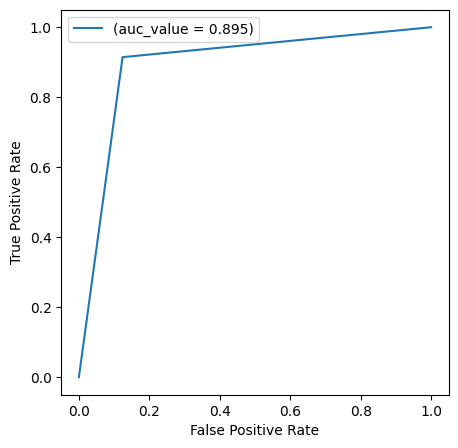


Confusion Matrix: 


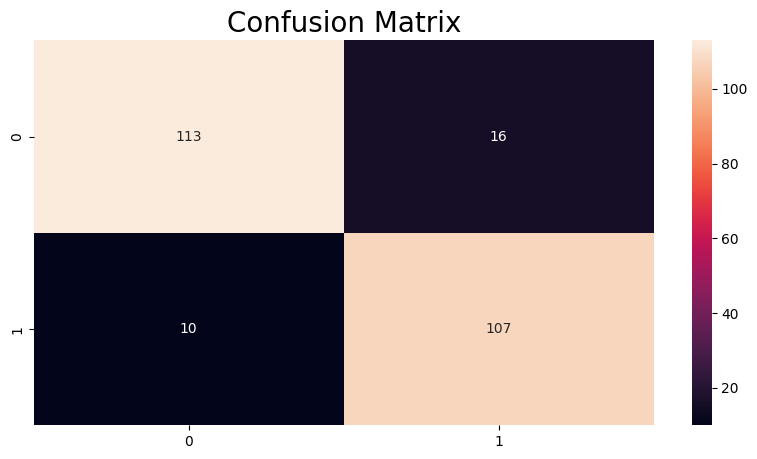

In [51]:
knn = KNeighborsClassifier()
result(knn)

**Gradient Boosting Classifier**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       129
           1       0.90      0.97      0.93       117

    accuracy                           0.93       246
   macro avg       0.93      0.93      0.93       246
weighted avg       0.93      0.93      0.93       246

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9308943089430894
----------------------------------------------------------------------------------------------------

F1 Score:  0.9300411522633745
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9300411522633745
----------------------------------------------------------------------------------------------------



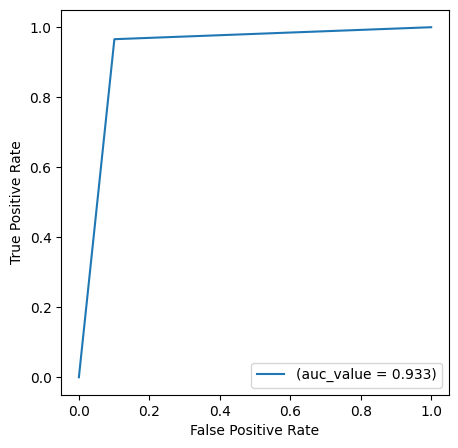


Confusion Matrix: 


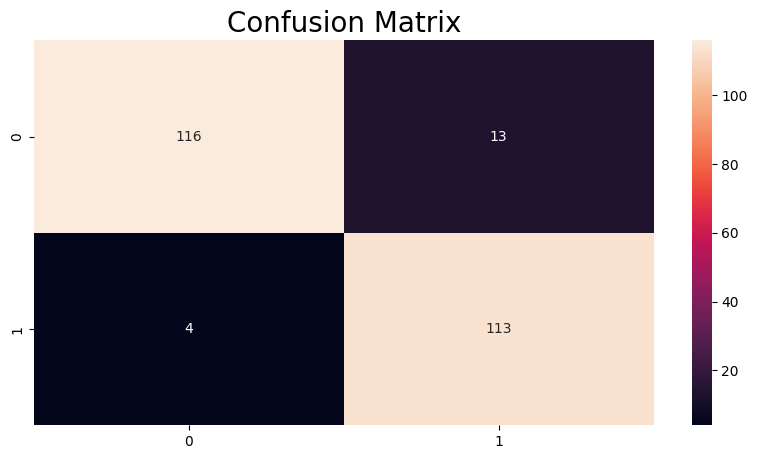

In [52]:
gb = GradientBoostingClassifier()
result(gb)

**XGBoost Classifier**

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.91      0.95       129
           1       0.91      0.98      0.95       117

    accuracy                           0.95       246
   macro avg       0.95      0.95      0.95       246
weighted avg       0.95      0.95      0.95       246

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9471544715447154
----------------------------------------------------------------------------------------------------

F1 Score:  0.9465020576131686
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9465020576131686
----------------------------------------------------------------------------------------------------



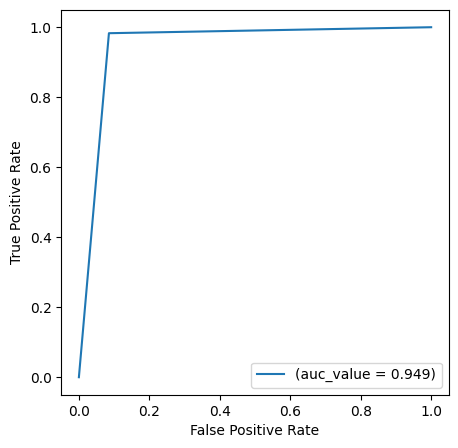


Confusion Matrix: 


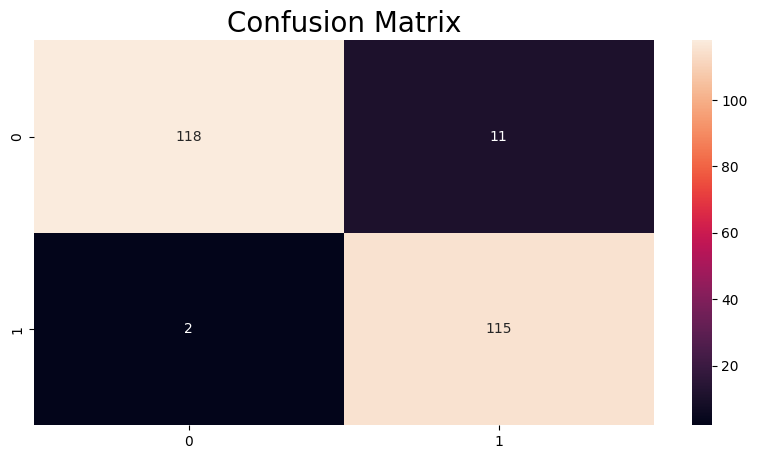

In [53]:
xg = xgb.XGBClassifier()
result(xg)

**Naive Bayes Classifier**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       129
           1       0.89      0.88      0.88       117

    accuracy                           0.89       246
   macro avg       0.89      0.89      0.89       246
weighted avg       0.89      0.89      0.89       246

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.8902439024390244
----------------------------------------------------------------------------------------------------

F1 Score:  0.8841201716738197
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.8841201716738197
----------------------------------------------------------------------------------------------------



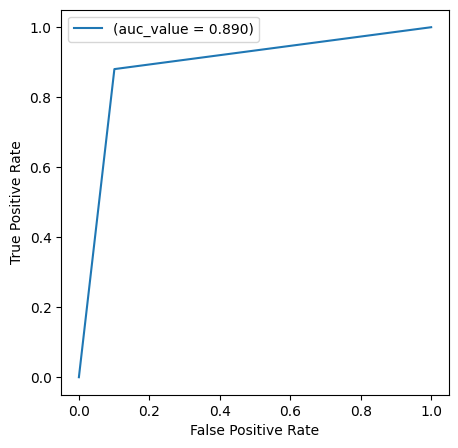


Confusion Matrix: 


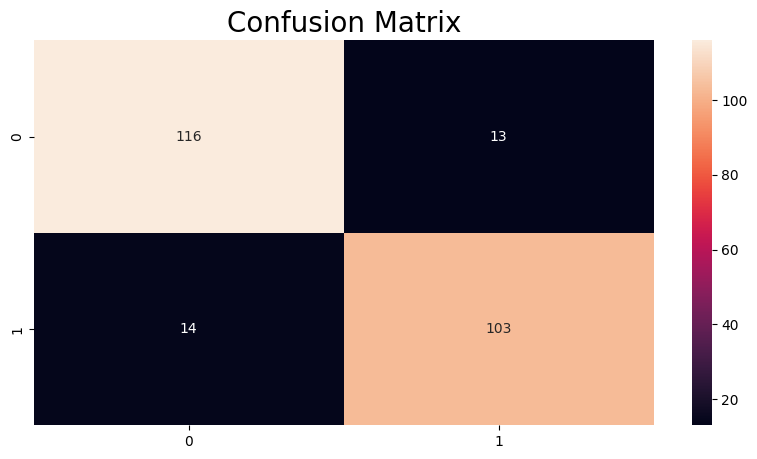

In [54]:
nb = GaussianNB()
result(nb)

**Decision Tree Classifier**

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.90      0.94       129
           1       0.90      0.97      0.93       117

    accuracy                           0.93       246
   macro avg       0.94      0.94      0.93       246
weighted avg       0.94      0.93      0.93       246

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9349593495934959
----------------------------------------------------------------------------------------------------

F1 Score:  0.9344262295081966
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9344262295081966
----------------------------------------------------------------------------------------------------



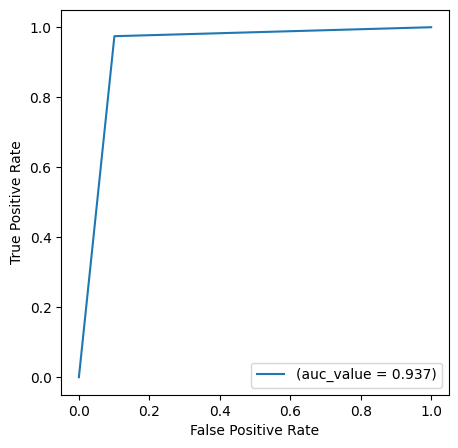


Confusion Matrix: 


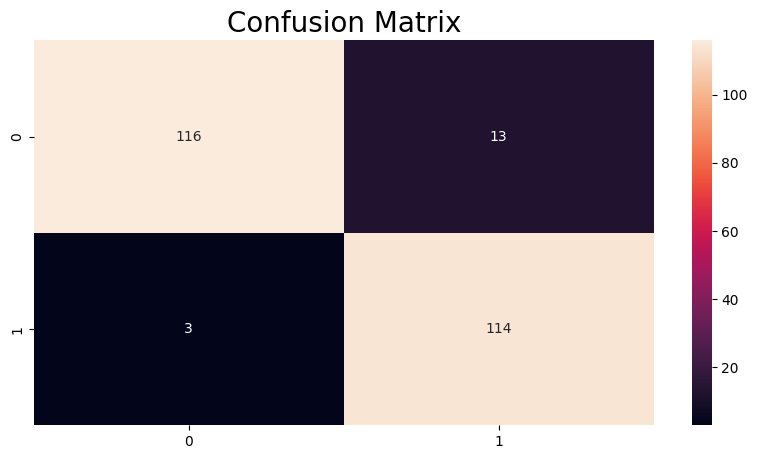

In [55]:
dt = DecisionTreeClassifier()
result(dt)

**Stochastic Gradient Descent Classifier**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       129
           1       0.90      0.80      0.85       117

    accuracy                           0.87       246
   macro avg       0.87      0.86      0.86       246
weighted avg       0.87      0.87      0.87       246

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.8658536585365854
----------------------------------------------------------------------------------------------------

F1 Score:  0.8506787330316742
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.8506787330316742
----------------------------------------------------------------------------------------------------



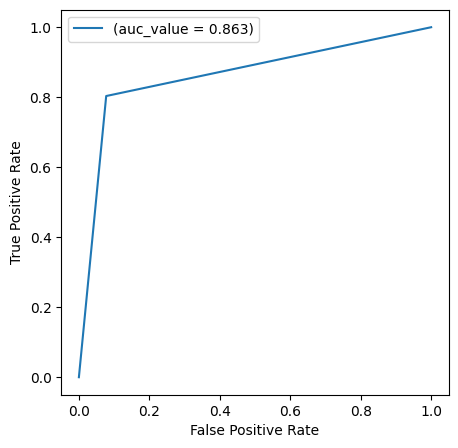


Confusion Matrix: 


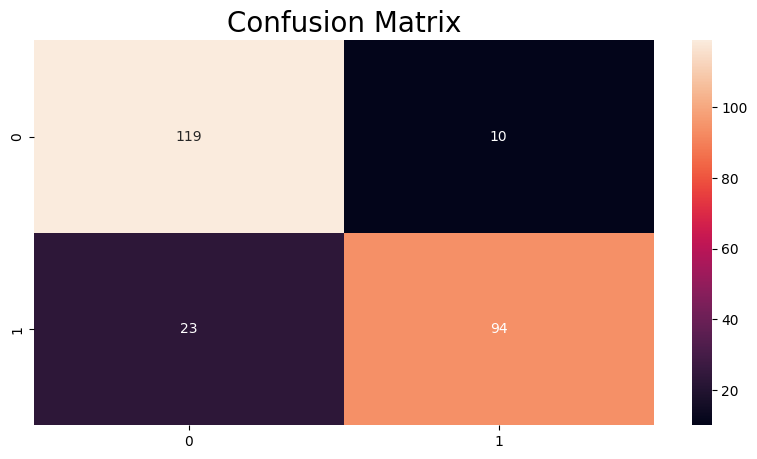

In [56]:
sgd = SGDClassifier()
result(sgd)

#Classifier Comparison

In [57]:
classifier_list = ["Logistic Regression", "Random Forest", "KNN", "Gradient Boosting", "XGBoost", "Naive Bayes", "Decision Tree", "Stochastic Gradient Descent"]
list_class = []
for i in range(0, len(classifier_list)):
  listclass = [classifier_list[i], accuracy_list[i], f1_list[i], roc_auc_list[i]]
  list_class.append(listclass)

list_class

[['Logistic Regression',
  0.8780487804878049,
  0.8717948717948718,
  0.877757901013715],
 ['Random Forest', 0.9634146341463414, 0.9623430962343097, 0.964321208507255],
 ['KNN', 0.8943089430894309, 0.8916666666666666, 0.8952494533889882],
 ['Gradient Boosting',
  0.9308943089430894,
  0.9300411522633745,
  0.9325183860067582],
 ['XGBoost', 0.9471544715447154, 0.9465020576131686, 0.9488173325382627],
 ['Naive Bayes', 0.8902439024390244, 0.8841201716738197, 0.8897833432717154],
 ['Decision Tree', 0.9349593495934959, 0.9344262295081966, 0.9367918902802626],
 ['Stochastic Gradient Descent',
  0.8658536585365854,
  0.8506787330316742,
  0.8629497117869211]]

In [58]:
cc_table = pd.DataFrame(list_class, columns = ["Classifier", "Accuracy", "F1 Score", "ROC-AUC Score"])
cc_table.sort_values(ascending = False, by = "Accuracy")

,Classifier,Accuracy,F1 Score,ROC-AUC Score
1,Random Forest,0.963415,0.962343,0.964321
4,XGBoost,0.947154,0.946502,0.948817
6,Decision Tree,0.934959,0.934426,0.936792
3,Gradient Boosting,0.930894,0.930041,0.932518
2,KNN,0.894309,0.891667,0.895249
5,Naive Bayes,0.890244,0.884120,0.889783
0,Logistic Regression,0.878049,0.871795,0.877758
7,Stochastic Gradient Descent,0.865854,0.850679,0.862950


-> Random Forest and XGBoost Classifiers give the best results with the highest values for the Evaluation Metrics

Plotting the Comparison Table as a Bar Plot for ROC_AUC Score

<Axes: xlabel='ROC-AUC Score', ylabel='Classifier'>

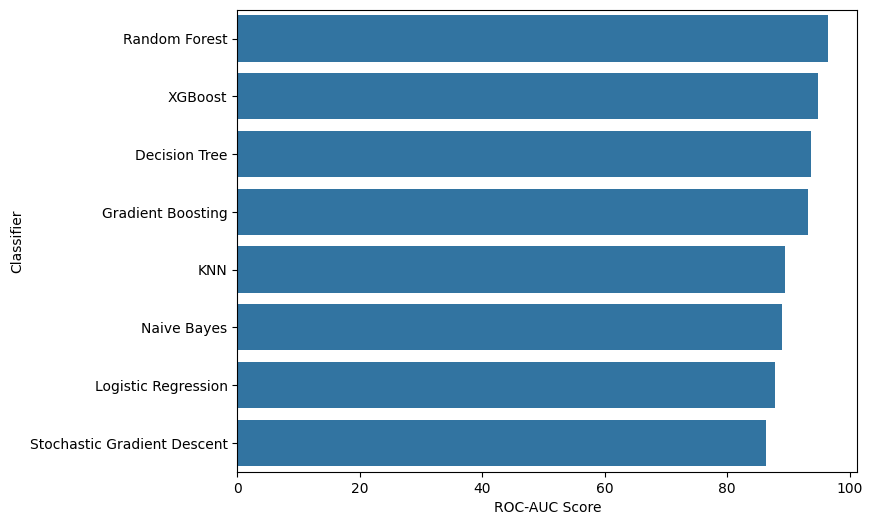

In [59]:
plt.figure(figsize = (8,6))
sns.barplot(x = cc_table["ROC-AUC Score"]*100,
            y = cc_table["Classifier"],
            data = cc_table,
            order = cc_table.sort_values("ROC-AUC Score", ascending = False).Classifier)

#TEST DATA

In [60]:
test.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,0,0,0,0,0,0,0,1,0,...,13.445319,m,Asian,no,no,United Arab Emirates,no,-0.914467,18 and more,?
1,2,1,0,0,0,1,0,0,0,0,...,25.057229,f,?,yes,no,New Zealand,no,4.553447,18 and more,Parent
2,3,1,0,0,1,0,1,0,1,0,...,28.799885,f,Asian,no,no,Austria,no,-1.581115,18 and more,Self
3,4,1,1,1,0,1,0,1,0,1,...,16.501526,f,Middle Eastern,yes,no,Bahamas,no,11.779210,18 and more,Relative
4,5,1,0,0,1,1,0,0,1,1,...,54.223869,f,White-European,no,no,Australia,no,10.717321,18 and more,Self


Cleaning the Test Data

In [61]:
test.shape

(200, 21)

In [62]:
test['age'] = test['age'].astype(int,errors='ignore')

In [63]:
test = test.drop(["contry_of_res","age_desc"], axis=1)

In [64]:
test = test.rename(columns={'austim':'autism'})

In [65]:
#gender
print(test['gender'].unique())
test['gender']= label_encoder.fit_transform(test['gender'])
print(test['gender'].unique())

['m' 'f']
[1 0]


In [66]:
#jaundice
print(test['jaundice'].unique())
test['jaundice']= label_encoder.fit_transform(test['jaundice'])
print(test['jaundice'].unique())

['no' 'yes']
[0 1]


In [67]:
#autism
print(test['autism'].unique())
test['autism']= label_encoder.fit_transform(test['autism'])
print(test['autism'].unique())

['no' 'yes']
[0 1]


In [68]:
#used_app_before
print(test['used_app_before'].unique())
test['used_app_before']= label_encoder.fit_transform(test['used_app_before'])
print(test['used_app_before'].unique())

['no' 'yes']
[0 1]


In [69]:
#relation
print(test['relation'].unique())
test['relation']= label_encoder.fit_transform(test['relation'])
print(test['relation'].unique())

['?' 'Parent' 'Self' 'Relative' 'Health care professional' 'Others']
[0 3 5 4 1 2]


In [70]:
#ethnicity
print(test['ethnicity'].unique())
test['ethnicity']= label_encoder.fit_transform(test['ethnicity'])
print(test['ethnicity'].unique())

['Asian' '?' 'Middle Eastern ' 'White-European' 'Latino' 'Pasifika'
 'Black' 'Hispanic' 'South Asian' 'Others' 'Turkish' 'others']
[ 1  0  5 10  4  7  2  3  8  6  9 11]


In [71]:
test.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,used_app_before,result,relation
0,1,0,0,0,0,0,0,0,1,0,0,13,1,1,0,0,0,-0.914467,0
1,2,1,0,0,0,1,0,0,0,0,0,25,0,0,1,0,0,4.553447,3
2,3,1,0,0,1,0,1,0,1,0,0,28,0,1,0,0,0,-1.581115,5
3,4,1,1,1,0,1,0,1,0,1,1,16,0,5,1,0,0,11.779210,4
4,5,1,0,0,1,1,0,0,1,1,0,54,0,10,0,0,0,10.717321,5


In [72]:
x_test = test.drop("ID", axis=1)
x_test.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,used_app_before,result,relation
0,0,0,0,0,0,0,0,1,0,0,13,1,1,0,0,0,-0.914467,0
1,1,0,0,0,1,0,0,0,0,0,25,0,0,1,0,0,4.553447,3
2,1,0,0,1,0,1,0,1,0,0,28,0,1,0,0,0,-1.581115,5
3,1,1,1,0,1,0,1,0,1,1,16,0,5,1,0,0,11.779210,4
4,1,0,0,1,1,0,0,1,1,0,54,0,10,0,0,0,10.717321,5


Since we got the best classification result for Random Forest Classifier, we use this classifier.

In [73]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x, y)
autism_pred = rf_classifier.predict(x_test)
autism_pred = np.array(autism_pred)
autism_pred = pd.DataFrame(autism_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


#Creating the output Submission file

In [74]:
test_data = pd.read_csv("../input/autism-prediction/Autism-prediction/test.csv")
test_data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,0,0,0,0,0,0,0,1,0,...,13.445319,m,Asian,no,no,United Arab Emirates,no,-0.914467,18 and more,?
1,2,1,0,0,0,1,0,0,0,0,...,25.057229,f,?,yes,no,New Zealand,no,4.553447,18 and more,Parent
2,3,1,0,0,1,0,1,0,1,0,...,28.799885,f,Asian,no,no,Austria,no,-1.581115,18 and more,Self
3,4,1,1,1,0,1,0,1,0,1,...,16.501526,f,Middle Eastern,yes,no,Bahamas,no,11.779210,18 and more,Relative
4,5,1,0,0,1,1,0,0,1,1,...,54.223869,f,White-European,no,no,Australia,no,10.717321,18 and more,Self


In [75]:
id_value = np.array(test['ID'])
id_value = pd.DataFrame(id_value)
id_value.shape

(200, 1)

In [76]:
final_result = pd.concat([id_value, autism_pred], join='outer', axis=1)
final_result.columns = ['ID', 'Class/ASD']
final_result

,ID,Class/ASD
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0
...,...,...
195,196,0
196,197,0
197,198,1
198,199,1


In [77]:
final_result["Class/ASD"].value_counts()

,count
Class/ASD,
0,158
1,42


In [79]:

# Calculate the accuracy score
accuracy = accuracy_score(y_test, rf.predict(X_test))

# Convert the accuracy to a percentage
accuracy_percentage = accuracy * 100

# Print the result
print(f"Accuracy: {accuracy_percentage:.2f}%")


Accuracy: 96.34%
